In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess data
df = pd.read_csv("Dataset/WIFIDATA.csv", nrows=200)
df = df.fillna("Unknown")
le = LabelEncoder()

In [3]:

# Encode categorical features
categorical_columns = ["ssid_name", "phy_type_id", "capabilities", "channel_center_freq_khz", "connection_mode",
                       "authentication", "encryption", "vendor_name", "bssid", "mac"]
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [4]:
# Define features (X) and target (y)
X = df[["ssid_name", "phy_type_id", "capabilities", "channel_center_freq_khz", "connection_mode",
        "authentication", "encryption", "vendor_name", "bssid", "mac"]]
y = df["result"]

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [6]:
# Define and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\forte\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [9]:
# Print evaluation metrics
print("Logistic Regression Model Performance")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Logistic Regression Model Performance
Accuracy: 0.95
Precision: 0.93
Recall: 1.00
F1 Score: 0.96
ROC AUC: 0.87


In [10]:
# Plot ROC curve
from sklearn.metrics import roc_curve

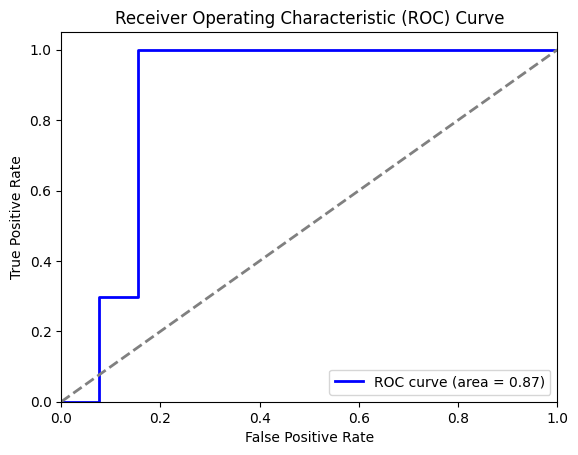

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()